In [26]:
%pylab inline
import matplotlib.pyplot as plt
import gala
import gala.potential as gp
import gala.dynamics as gd
import bfe
from scipy.spatial.transform import Rotation as Rot


%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


/mnt/home/nico/projects/time-dependent-BFE/pyexp/lib/python3.9/site-packages/IPython/core/magics/pylab.py:162: UserWarning: pylab import has clobbered these variables: ['axes', 'grid']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [2]:
plt.style.use('~/matplotlib.mplstyle')

In [131]:
def sample_hern(size=1):
    mu = np.random.random(size=size)
    return mu**0.5 / (1-mu**0.5)

def spherical_hern(a, b, c, theta_rot, size=1):
    phi = np.random.uniform(0, 2*np.pi, size=size)
    theta = np.arccos(2*np.random.random(size=size) - 1)
    r = sample_hern(size)
    
    xyz = np.zeros((size, 3))
    xyz[:,0] = r * np.cos(phi) * np.sin(theta) / a
    xyz[:,1] = r * np.sin(phi) * np.sin(theta) / b
    xyz[:,2] = r * np.cos(theta) / c
    
    rot = Rot.from_euler('z', theta_rot, degrees=True)
    rot_xyz = rot.apply(xyz)
    #xa = rot_xyz[0]
    #yb = rot_xyz[1]
    #zc = rot_xyz[2]
    
    return rot_xyz

In [132]:
xyz_hern = spherical_hern(1, 0.5, 0.5, 45, 1000)

(-5.0, 5.0)

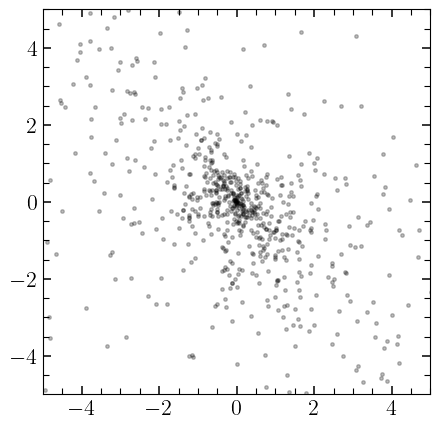

In [133]:
plt.figure(figsize=(5,5))
plt.scatter(xyz_hern[:,0], xyz_hern[:,1], color='k', alpha=0.25, marker='.')
plt.xlim(-5, 5)
plt.ylim(-5, 5)

In [ ]:
def flttened_hernquist_sample(x, y, z, M, a, b, c, rs, theta):
    ## implement rotation
    xyz = np.array([x/a, y/b, z/c])
    rot = Rot.from_euler('x', theta, degrees=True)
    rot_xyz = rot.apply(xyz)
    xa = rot_xyz[0]
    yb = rot_xyz[1]
    zc = rot_xyz[2]
    #s = np.sqrt((x/a)**2 + (y/b)**2 + (z/c)**2)
    s = np.sqrt((xa)**2 + (yb)**2 + (zc)**2)
    return hernquist_density(s, M, rs)

In [52]:
def hernquist_density(r, M, a):
    return M*a / (2*np.pi) / (r*(r+a)**3)

def flattened_hernquist_density(x, y, z, M, a, b, c, rs, theta):
    ## implement rotation
    xyz = np.array([x/a, y/b, z/c])
    rot = Rot.from_euler('x', theta, degrees=True)
    rot_xyz = rot.apply(xyz)
    xa = rot_xyz[0]
    yb = rot_xyz[1]
    zc = rot_xyz[2]
    #s = np.sqrt((x/a)**2 + (y/b)**2 + (z/c)**2)
    s = np.sqrt((xa)**2 + (yb)**2 + (zc)**2)
    return hernquist_density(s, M, rs)

In [36]:
#def built_triaxial_halo(T)

In [5]:
# a>b>c

In [ ]:
#s = c/a # minor to major axis
#q = b/a # interm. to major axis#

In [ ]:
T = (a**2 - b**2) / (a**2 - c**2)
print(T)

In [61]:
M = 1.
rs = 1.
a_prolate = 1
b_prolate = 0.5
c_prolate = 0.5
theta = 0
coeff_prolate = gp.scf.compute_coeffs(flattened_hernquist_density, nmax=10, lmax=8,
                            M=M, r_s=rs, args=(M, a_prolate, b_prolate, c_prolate, rs, theta), skip_m=False)
(S_prolate,Serr),(T_prolate,Terr) = coeff_prolate

KeyboardInterrupt: 

In [9]:
pot_prolate = gp.SCFPotential(m=1., r_s=1,
                              SnS_prolaterolate, Tnlm=T_prolate)

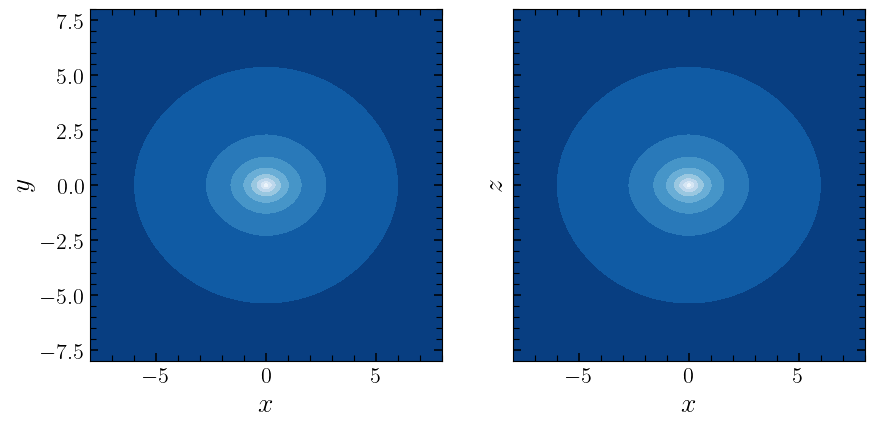

In [11]:
a_oblate = 1
b_oblate = 1
c_oblate = 0.5

coeff_oblate = gp.scf.compute_coeffs(flattened_hernquist_density, nmax=10, lmax=8,
                                     M=M, r_s=rs, args=(M, a_oblate, b_oblate, c_oblate, rs), skip_m=False)
(S_oblate,Serr),(T_oblate,Terr) = coeff_oblate

In [12]:
pot_oblate = gp.SCFPotential(m=1., r_s=1,
                             Snlm=S_oblate, Tnlm=T_oblate)

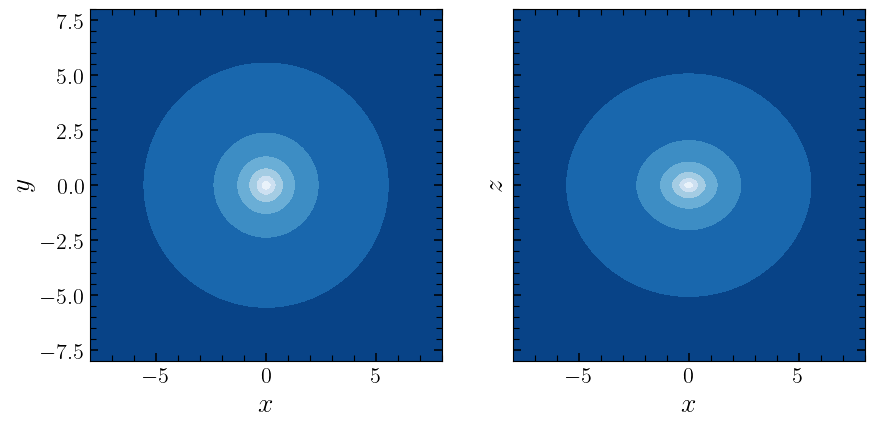

In [17]:
grid = np.linspace(-8, 8, 128)

fig, axes = plt.subplots(1, 2, figsize=(10, 5),
                         sharex=True, sharey=True)
_ = pot_oblate.plot_contours((grid, grid, 0), ax=axes[0])
axes[0].set_xlabel('$x$')
axes[0].set_ylabel('$y$')

_ = pot_oblate.plot_contours((grid, 0, grid), ax=axes[1])
axes[1].set_xlabel('$x$')
axes[1].set_ylabel('$z$')

for ax in axes:
    ax.set_aspect('equal')


In [60]:
M = 1.
rs = 1.
a_prolate = 1
b_prolate = 0.5
c_prolate = 0.5
theta = 30
coeff_prolate_rot = gp.scf.compute_coeffs(flattened_hernquist_density, nmax=1, lmax=8,
                            M=M, r_s=rs, args=(M, a_prolate, b_prolate, c_prolate, rs, theta), skip_m=False)
(S_prolate_rot,Serr),(T_prolate_rot,Terr) = coeff_prolate_rot

KeyboardInterrupt: 

In [ ]:
prolate_coefs = bfe.coefficients.Coeff_properties(S_prolate, T_prolate, nmax=11, lmax=9)
oblate_coefs = bfe.coefficients.Coeff_properties(S_oblate, T_oblate, nmax=11, lmax=9)

# rotated:
prolate_coefs_rot = bfe.coefficients.Coeff_properties(S_prolate_rot, T_prolate_rot, nmax=11, lmax=9)


In [15]:
U_prolate = prolate_coefs.U_all()
U_oblate = oblate_coefs.U_all()

/tmp/ipykernel_4014806/3446480937.py:15: RuntimeWarning: divide by zero encountered in log10
  im = axes[2].imshow(np.log10(-np.sum(U_prolate[:,:,:], axis=0)).T, origin='lower')


Text(0.5, 0.98, 'Prolate')

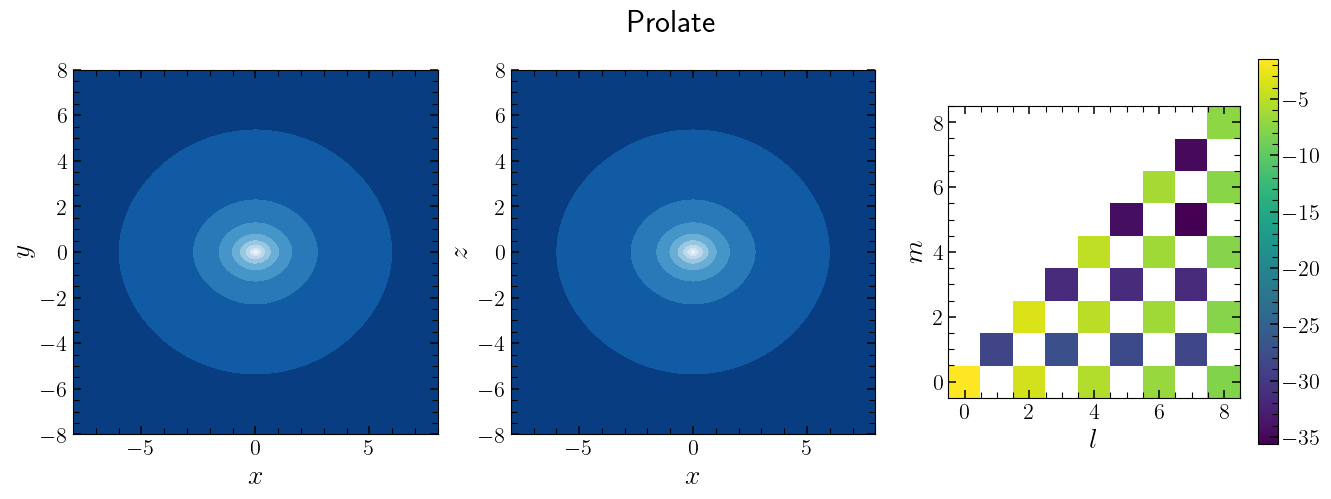

In [57]:
grid = np.linspace(-8, 8, 128)

fig, axes = plt.subplots(1, 3, figsize=(16, 5))
_ = pot_prolate.plot_contours((grid, grid, 0), ax=axes[0])
axes[0].set_xlabel('$x$')
axes[0].set_ylabel('$y$')

_ = pot_prolate.plot_contours((grid, 0, grid), ax=axes[1])
axes[1].set_xlabel('$x$')
axes[1].set_ylabel('$z$')

for ax in axes:
    ax.set_aspect('equal')

im = axes[2].imshow(np.log10(-np.sum(U_prolate[:,:,:], axis=0)).T, origin='lower')
axes[2].set_xlabel('$l$')
axes[2].set_ylabel('$m$')
fig.colorbar(im, ax=axes[2])
axes[2].set_xticks(np.arange(0, 9, 2))
axes[2].set_yticks(np.arange(0, 9, 2))
fig.suptitle('Prolate', fontsize=23)

/tmp/ipykernel_4014806/2090814092.py:15: RuntimeWarning: divide by zero encountered in log10
  im = axes[2].imshow(np.log10(-np.sum(U_oblate[:,:,:], axis=0)).T, origin='lower')


Text(0.5, 0.98, 'Oblate')

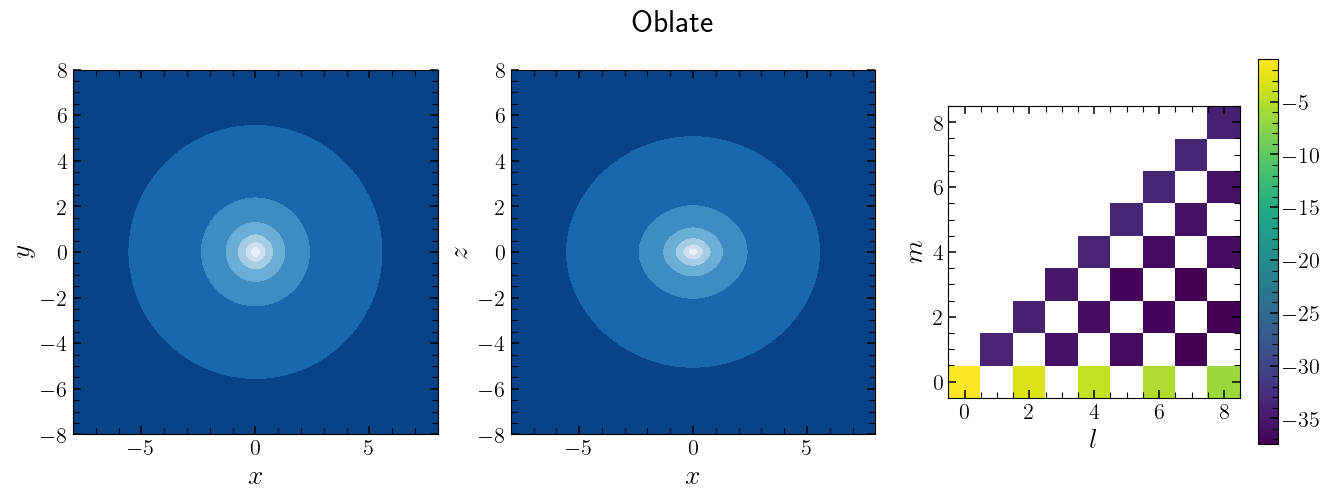

In [59]:
grid = np.linspace(-8, 8, 128)

fig, axes = plt.subplots(1, 3, figsize=(16, 5))
_ = pot_oblate.plot_contours((grid, grid, 0), ax=axes[0])
axes[0].set_xlabel('$x$')
axes[0].set_ylabel('$y$')

_ = pot_oblate.plot_contours((grid, 0, grid), ax=axes[1])
axes[1].set_xlabel('$x$')
axes[1].set_ylabel('$z$')

for ax in axes:
    ax.set_aspect('equal')

im = axes[2].imshow(np.log10(-np.sum(U_oblate[:,:,:], axis=0)).T, origin='lower')
axes[2].set_xlabel('$l$')
axes[2].set_ylabel('$m$')
fig.colorbar(im, ax=axes[2])
axes[2].set_xticks(np.arange(0, 9, 2))
axes[2].set_yticks(np.arange(0, 9, 2))
fig.suptitle('Oblate', fontsize=23)

In [ ]:
grid = np.linspace(-8, 8, 128)

fig, axes = plt.subplots(1, 3, figsize=(16, 5))
_ = pot_prolate_rot.plot_contours((grid, grid, 0), ax=axes[0])
axes[0].set_xlabel('$x$')
axes[0].set_ylabel('$y$')

_ = pot_prolate_rot.plot_contours((grid, 0, grid), ax=axes[1])
axes[1].set_xlabel('$x$')
axes[1].set_ylabel('$z$')

for ax in axes:
    ax.set_aspect('equal')

im = axes[2].imshow(np.log10(-U_prolate_rot[0,:,:]).T, origin='lower')
axes[2].set_xlabel('$l$')
axes[2].set_ylabel('$m$')
fig.colorbar(im, ax=axes[2])
axes[2].set_xticks(np.arange(0, 9, 2))
axes[2].set_yticks(np.arange(0, 9, 2))
fig.suptitle('Prolate', fontsize=23)

In [18]:
# Conclusions: 
Odd values of l and m are not present (non axi-symmetric)

In [33]:
np.sum(U[:,:,1])

-6.5022649297717135e-28

In [34]:
np.sum(U[:,2:,0])

-0.00014377005664498657

In [35]:
S[0,1,0]/T[0, 1, 0]

/tmp/ipykernel_3314707/3443102110.py:1: RuntimeWarning: invalid value encountered in double_scalars
  S[0,1,0]/T[0, 1, 0]


nan